Importing necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Loading training data and concatinating

In [3]:

training_data = pd.read_csv('Data/training_data.csv')
training_data_target = pd.read_csv('Data/training_data_targets.csv')

training_data_target_shifted = training_data_target.shift(1)

training_data_target_shifted.rename(columns={'3.2': 'Price'}, inplace=True)

training_data_target_shifted.at[0, 'Price'] = 3.2

training_data_with_price=pd.concat([training_data,training_data_target_shifted],axis=1)

training_data_with_price.head()


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87


In [119]:
training_data_with_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5416 non-null   object 
 8   Engine             5383 non-null   object 
 9   Power              5383 non-null   object 
 10  Seats              5379 non-null   float64
 11  Price              5416 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 508.0+ KB


In [120]:
training_data_with_price.describe()

,Year,Kilometers_Driven,Seats,Price
count,5417.000000,5.417000e+03,5379.000000,5416.00000
mean,2013.363670,5.882682e+04,5.280350,9.45440
std,3.283659,9.511826e+04,0.811459,11.16756
min,1998.000000,1.710000e+02,0.000000,0.44000
25%,2011.000000,3.400000e+04,5.000000,3.50000
50%,2014.000000,5.329300e+04,5.000000,5.65000
75%,2016.000000,7.300000e+04,5.000000,9.90000
max,2019.000000,6.500000e+06,10.000000,160.00000


In [121]:
training_data_with_price.shape

(5417, 12)

In [4]:
print(training_data_with_price['Location'].unique())
print(training_data_with_price['Fuel_Type'].unique())
print(training_data_with_price['Transmission'].unique())
print(training_data_with_price['Owner_Type'].unique())


['Delhi' 'Pune' 'Jaipur' 'Ahmedabad' 'Hyderabad' 'Mumbai' 'Bangalore'
 'Chennai' 'Kolkata' 'Kochi' 'Coimbatore']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Automatic' 'Manual']
['Second' 'First' 'Third' 'Fourth & Above']


In [123]:
print(training_data_with_price['Year'].unique())

[2014 2013 2012 2016 2018 2015 2011 2017 2009 2019 2008 2007 2010 2000
 2006 2002 2005 1998 2004 2003 2001 1999]


In [5]:
training_data_with_price.head()


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87


In [125]:
training_data_with_price.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
Price                 1
dtype: int64

Now we create parallel column for each column that contain value with units like Mileage,engine,power

In [6]:
for i in range(training_data_with_price.shape[0]):
    training_data_with_price.at[i, 'Company'] = training_data_with_price['Brand'][i].split()[0]
    
    # Check if the value in 'Mileage' is a string before splitting
    if isinstance(training_data_with_price['Mileage'][i], str):
        training_data_with_price.at[i, 'Mileage(km/kg)'] = training_data_with_price['Mileage'][i].split()[0]
    
    # Check if the value in 'Engine' is a string before splitting
    if isinstance(training_data_with_price['Engine'][i], str):
        training_data_with_price.at[i, 'Engine(CC)'] = training_data_with_price['Engine'][i].split()[0]
    
    # Check if the value in 'Power' is a string before splitting
    if isinstance(training_data_with_price['Power'][i], str):
        training_data_with_price.at[i, 'Power(bhp)'] = training_data_with_price['Power'][i].split()[0]
    
# Convert to float only if the values are not already NaN or float
training_data_with_price['Mileage(km/kg)'] = pd.to_numeric(training_data_with_price['Mileage(km/kg)'], errors='coerce')
training_data_with_price['Engine(CC)'] = pd.to_numeric(training_data_with_price['Engine(CC)'], errors='coerce')

# training_data_with_price['Power(bhp)'] = training_data_with_price['Power(bhp)'].astype(float)

In [7]:
training_data_with_price.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20,Maruti,23.10,998.0,67.04
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50,Audi,14.16,1968.0,174.3
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75,Toyota,23.59,1364.0,67.1
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90,Maruti,26.20,998.0,58.2
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87,Maruti,20.51,998.0,67


Now we check which power value is null and replace it with 0

In [8]:
indexes_method = training_data_with_price[training_data_with_price['Power(bhp)'] == 'null'].index.tolist()
print(indexes_method)
training_data_with_price.replace({"null":0},inplace=True)
training_data_with_price['Power(bhp)'] = training_data_with_price['Power(bhp)'].astype(float)

[183, 230, 249, 254, 273, 276, 313, 348, 418, 467, 476, 506, 517, 572, 616, 618, 684, 753, 808, 814, 901, 1009, 1085, 1089, 1101, 1109, 1196, 1372, 1406, 1542, 1581, 1597, 1653, 1711, 1760, 1797, 1806, 1847, 1874, 1899, 1917, 1960, 2031, 2088, 2126, 2129, 2144, 2278, 2329, 2418, 2493, 2498, 2561, 2664, 2757, 2951, 3034, 3048, 3050, 3151, 3303, 3305, 3350, 3357, 3437, 3467, 3475, 3490, 3534, 3645, 3731, 3773, 3871, 3928, 3937, 3972, 4054, 4073, 4208, 4275, 4332, 4370, 4380, 4387, 4418, 4432, 4437, 4584, 4802, 4837, 5156, 5165, 5237, 5297, 5300]


now fill missing value with mean imputaion method

In [10]:
import pandas as pd

# Assuming 'training_data_with_price' is your DataFrame

# Print the shape before any changes
print("Shape of train data Before imputation: ", training_data_with_price.shape)

# Define columns to impute
columns_to_impute = ['Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Seats', 'Price']

# Impute missing values with the mean
for column in columns_to_impute:
    training_data_with_price[column].fillna(training_data_with_price[column].mean(), inplace=True)

# Print the shape after imputation
print("Shape of train data After imputation: ", training_data_with_price.shape)


Shape of train data Before imputation:  (5417, 16)
Shape of train data After imputation:  (5417, 16)


after mean imputaion let's look at missing values

In [11]:
training_data_with_price.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                 0
Price                 0
Company               0
Mileage(km/kg)        0
Engine(CC)            0
Power(bhp)            0
dtype: int64

we see that there is no missing values in column we needed

In [131]:
training_data_with_price.shape

(5417, 16)

In [132]:
training_data_with_price.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20,Maruti,23.10,998.0,67.04
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50,Audi,14.16,1968.0,174.30
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75,Toyota,23.59,1364.0,67.10
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90,Maruti,26.20,998.0,58.20
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87,Maruti,20.51,998.0,67.00


Now,

we will delete all useless features

In [12]:
training_data_with_price.drop(["Brand"],axis=1,inplace=True)
training_data_with_price.drop(["Mileage"],axis=1,inplace=True)
training_data_with_price.drop(["Engine"],axis=1,inplace=True)
training_data_with_price.drop(["Power"],axis=1,inplace=True)

In [13]:
training_data_with_price.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Company              0
Mileage(km/kg)       0
Engine(CC)           0
Power(bhp)           0
dtype: int64

Above we see that there is no missing values

In [135]:
training_data_with_price.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Delhi,2014,35214,Petrol,Automatic,Second,5.0,3.20,Maruti,23.10,998.0,67.04
1,Delhi,2013,71000,Diesel,Automatic,First,5.0,21.50,Audi,14.16,1968.0,174.30
2,Pune,2012,111000,Diesel,Manual,First,5.0,4.75,Toyota,23.59,1364.0,67.10
3,Pune,2012,90400,CNG,Manual,First,5.0,2.90,Maruti,26.20,998.0,58.20
4,Jaipur,2016,68630,Petrol,Automatic,First,5.0,3.87,Maruti,20.51,998.0,67.00


Data visualization

In [136]:
training_data_with_price['Price'].describe()

count    5417.000000
mean        9.454400
std        11.166529
min         0.440000
25%         3.500000
50%         5.650000
75%         9.900000
max       160.000000
Name: Price, dtype: float64

let's look at target variable

(0.0, 160.0)

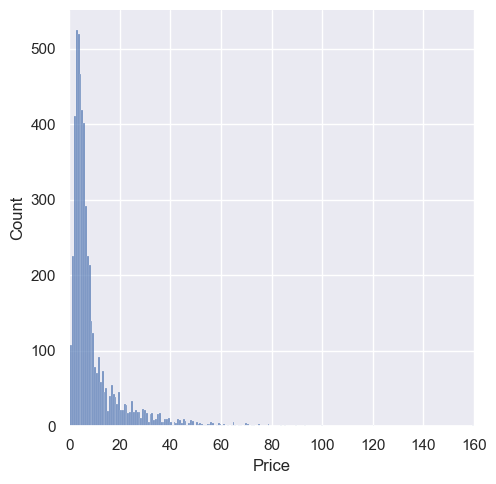

In [14]:

sns.displot(training_data_with_price['Price'])
plt.xlim([0,160])

Fuel type

In [15]:
training_data_with_price['Fuel_Type'].describe()

count       5417
unique         5
top       Diesel
freq        2876
Name: Fuel_Type, dtype: object

(-0.5, 4.5, 0.0, 165.0)

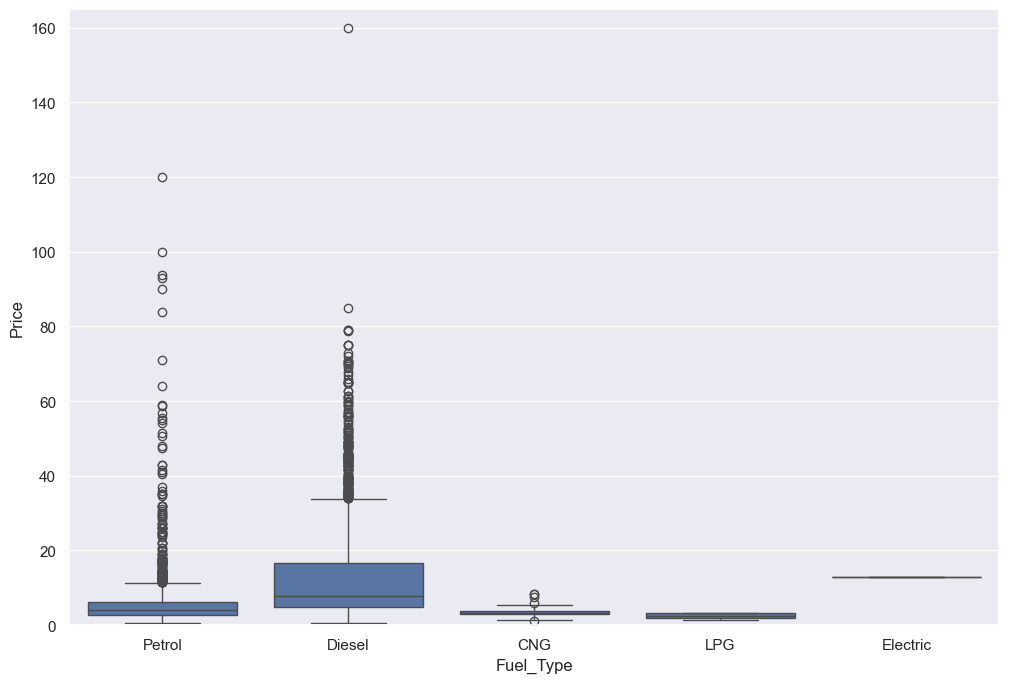

In [16]:
var = 'Fuel_Type'
data = pd.concat([training_data_with_price['Price'], training_data_with_price[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165)

Year

<Axes: xlabel='Year', ylabel='Price'>

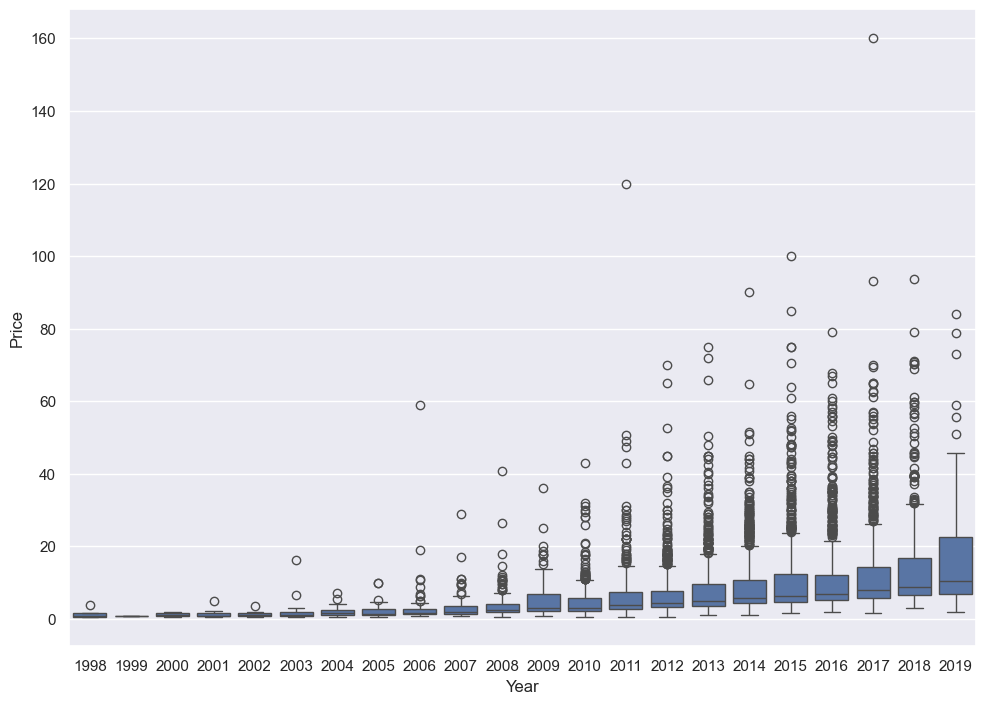

In [17]:
var = 'Year'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x = var, y ='Price', data = training_data_with_price) 

Clearly we see that price of newest car is high

Owner type

<Axes: xlabel='Owner_Type', ylabel='Price'>

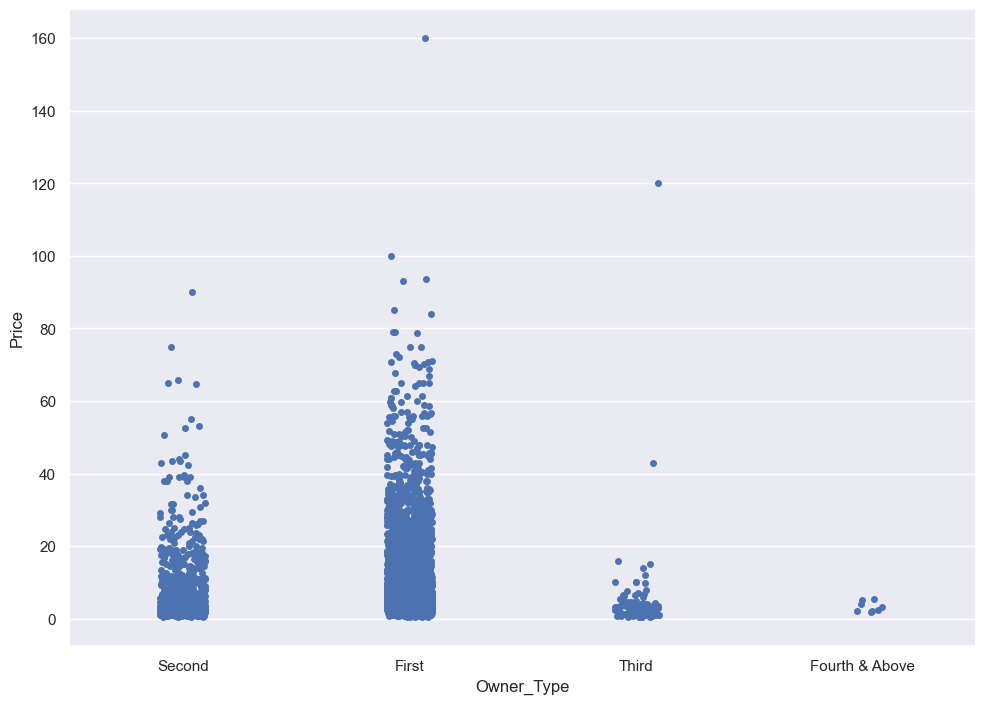

In [18]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = training_data_with_price) 

Company

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'Toyota'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Mahindra'),
  Text(5, 0, 'BMW'),
  Text(6, 0, 'Honda'),
  Text(7, 0, 'Chevrolet'),
  Text(8, 0, 'Mercedes-Benz'),
  Text(9, 0, 'Tata'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Skoda'),
  Text(12, 0, 'Mitsubishi'),
  Text(13, 0, 'Ford'),
  Text(14, 0, 'Renault'),
  Text(15, 0, 'Volkswagen'),
  Text(16, 0, 'Datsun'),
  Text(17, 0, 'Nissan'),
  Text(18, 0, 'Land'),
  Text(19, 0, 'Porsche'),
  Text(20, 0, 'Fiat'),
  Text(21, 0, 'Volvo'),
  Text(22, 0, 'Jeep'),
  Text(23, 0, 'Mini'),
  Text(24, 0, 'Force'),
  Text(25, 0, 'Bentley'),
  Text(26, 0, 'ISUZU'),
  Text(27, 0, 'Isuzu'),
  Text(28, 0, 'Lamborghini')])

<Figure size 2000x1000 with 0 Axes>

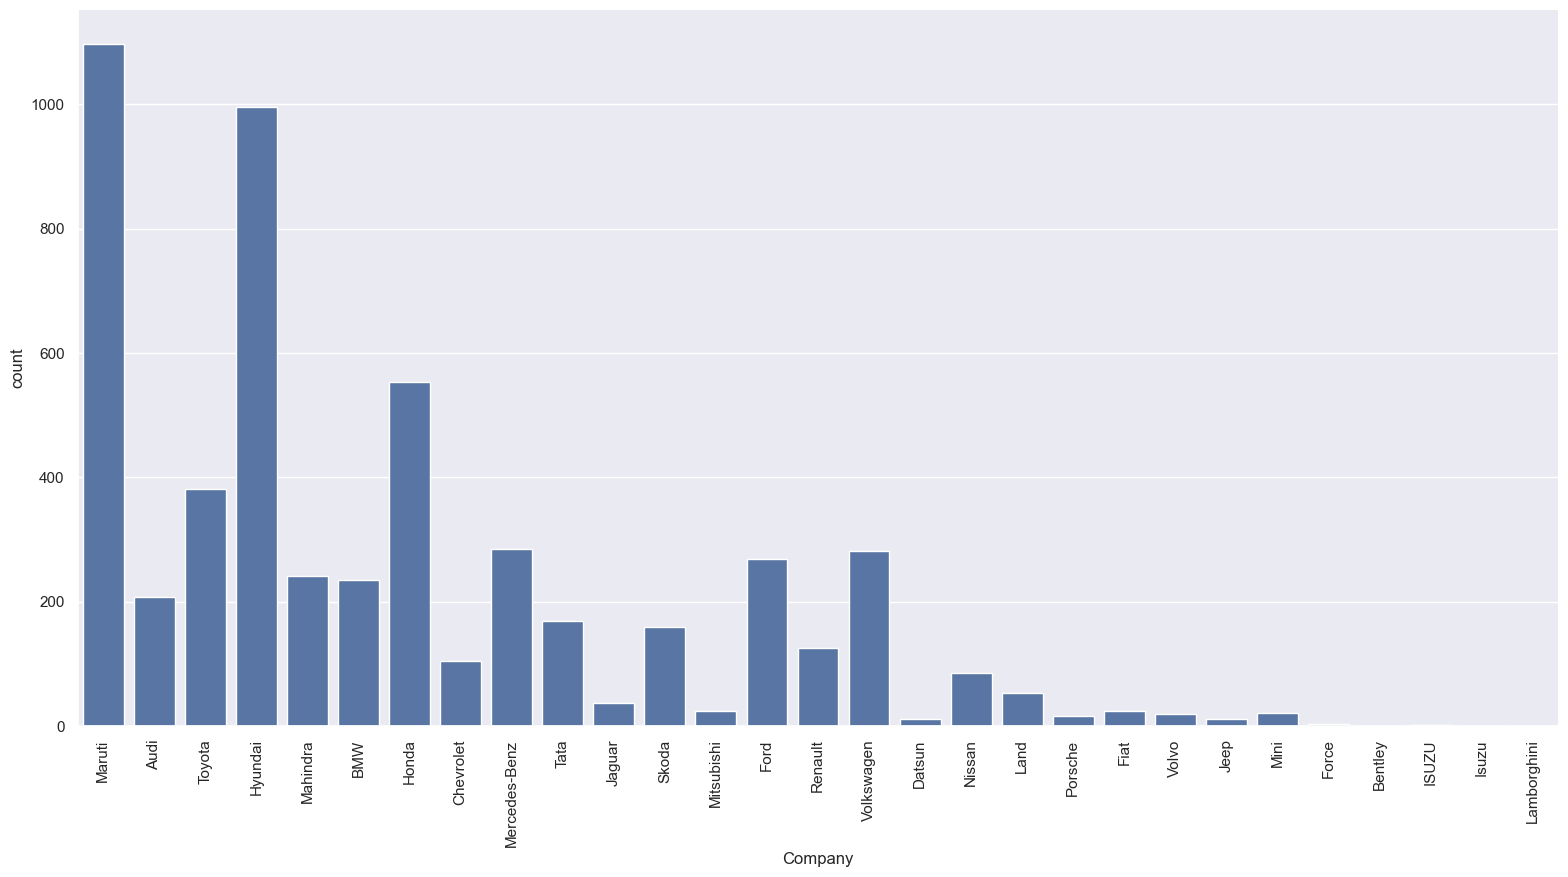

In [19]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", height=8, aspect=2, data=training_data_with_price)
plt.xticks(rotation=90)

Handling categorical data

In [20]:
var = 'Location'
training_data_with_price[var].value_counts()

Location
Mumbai        706
Hyderabad     668
Coimbatore    579
Kochi         575
Pune          564
Delhi         512
Kolkata       475
Chennai       439
Jaipur        368
Bangalore     333
Ahmedabad     198
Name: count, dtype: int64

Now from above we see that mumbai have more number of cars

<function matplotlib.pyplot.show(close=None, block=None)>

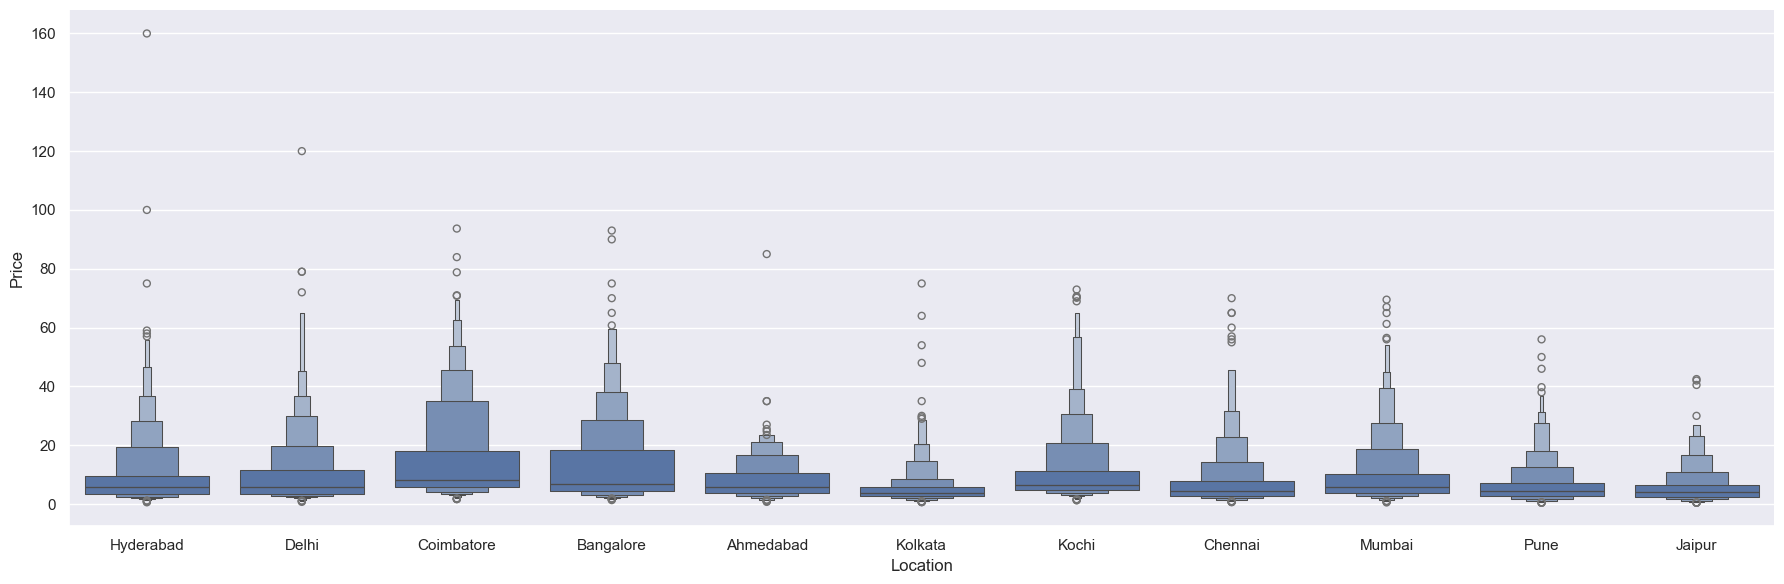

In [21]:
sns.catplot(y='Price',x=var,data= training_data_with_price.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

We will be using One-hot-encoding here

In [22]:
Location = training_data_with_price[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False


Fuel type

In [23]:
var = 'Fuel_Type'
training_data_with_price[var].value_counts()

Fuel_Type
Diesel      2876
Petrol      2482
CNG           49
LPG            9
Electric       1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

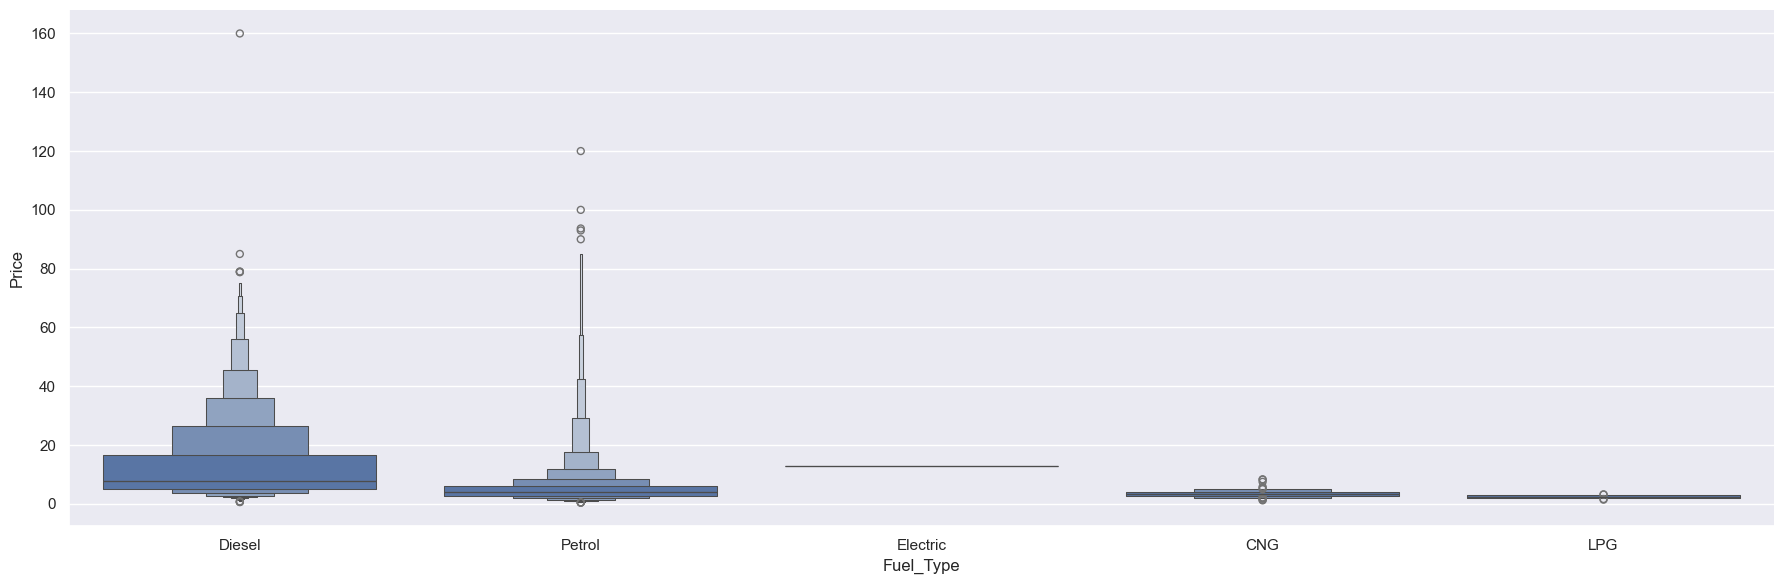

In [24]:
sns.catplot(y='Price',x=var,data= training_data_with_price.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [25]:
Fuel_t = training_data_with_price[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,False,False,False,True
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,False,False,True


Working with Transmission

In [26]:
var = 'Transmission'
training_data_with_price[var].value_counts()

Transmission
Manual       3890
Automatic    1527
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

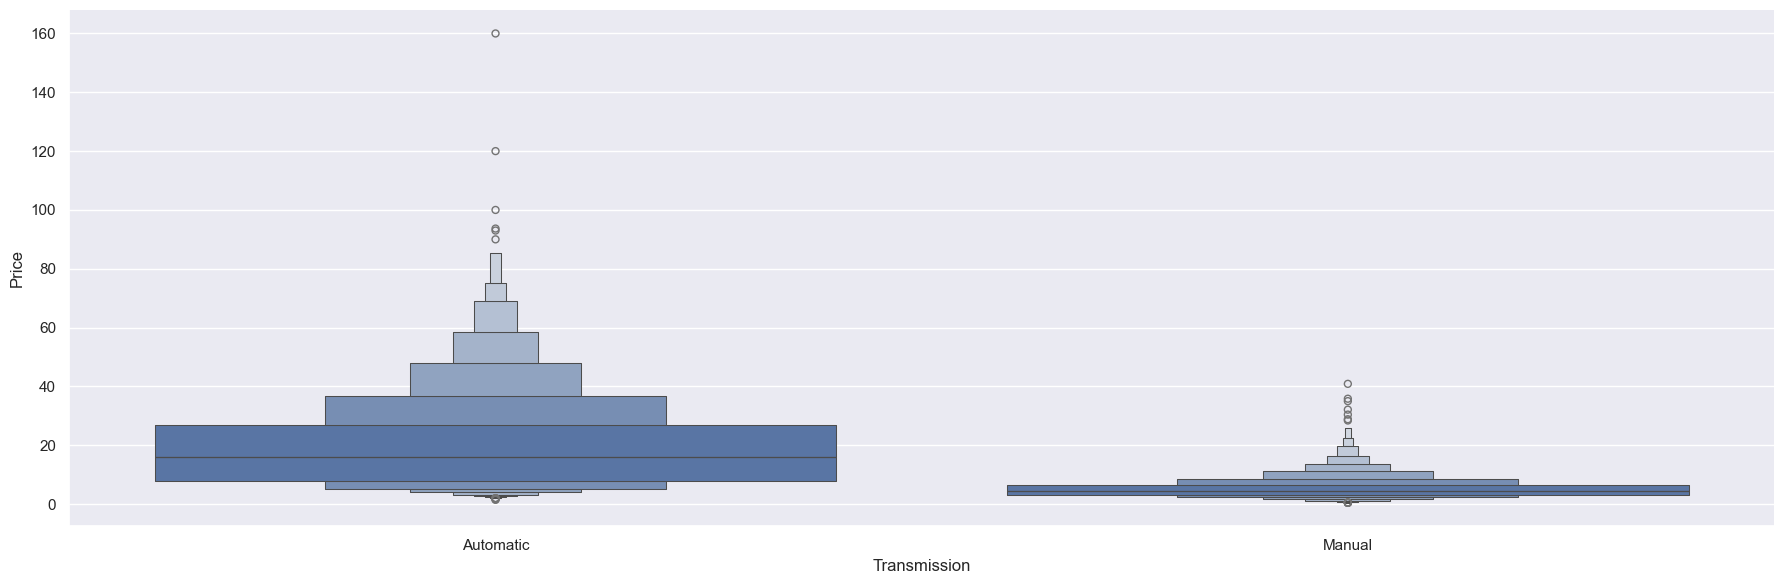

In [27]:
sns.catplot(y='Price',x=var,data= training_data_with_price.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

there is no order so one hot encoding

In [28]:
Transmission = training_data_with_price[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,False
1,False
2,True
3,True
4,False


Now owner type

In [29]:
var = 'Owner_Type'
training_data_with_price[var].value_counts()

Owner_Type
First             4431
Second             875
Third              103
Fourth & Above       8
Name: count, dtype: int64

Here we do label-encoding due to ordered data(owner_type)

In [30]:
training_data_with_price.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
training_data_with_price.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Delhi,2014,35214,Petrol,Automatic,2,5.0,3.20,Maruti,23.10,998.0,67.04
1,Delhi,2013,71000,Diesel,Automatic,1,5.0,21.50,Audi,14.16,1968.0,174.30
2,Pune,2012,111000,Diesel,Manual,1,5.0,4.75,Toyota,23.59,1364.0,67.10
3,Pune,2012,90400,CNG,Manual,1,5.0,2.90,Maruti,26.20,998.0,58.20
4,Jaipur,2016,68630,Petrol,Automatic,1,5.0,3.87,Maruti,20.51,998.0,67.00


Now its time for company feature

In [31]:
var ='Company'
training_data_with_price[var].value_counts()

Company
Maruti           1097
Hyundai           995
Honda             554
Toyota            381
Mercedes-Benz     285
Volkswagen        281
Ford              269
Mahindra          242
BMW               235
Audi              208
Tata              169
Skoda             159
Renault           125
Chevrolet         104
Nissan             85
Land               53
Jaguar             37
Mitsubishi         25
Fiat               24
Mini               21
Volvo              19
Porsche            17
Datsun             12
Jeep               12
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Lamborghini         1
Name: count, dtype: int64

There are so much variation so we will drop this feature

In [32]:
training_data_with_price.drop(["Company"],axis=1,inplace=True)

In [33]:
training_data_with_price.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp)
0,Delhi,2014,35214,Petrol,Automatic,2,5.0,3.20,23.10,998.0,67.04
1,Delhi,2013,71000,Diesel,Automatic,1,5.0,21.50,14.16,1968.0,174.30
2,Pune,2012,111000,Diesel,Manual,1,5.0,4.75,23.59,1364.0,67.10
3,Pune,2012,90400,CNG,Manual,1,5.0,2.90,26.20,998.0,58.20
4,Jaipur,2016,68630,Petrol,Automatic,1,5.0,3.87,20.51,998.0,67.00


In [34]:
train_data= pd.concat([training_data_with_price,Location,Fuel_t,Transmission],axis=1)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Delhi,2014,35214,Petrol,Automatic,2,5.0,3.20,23.10,998.0,...,False,False,False,False,False,False,False,False,True,False
1,Delhi,2013,71000,Diesel,Automatic,1,5.0,21.50,14.16,1968.0,...,False,False,False,False,False,True,False,False,False,False
2,Pune,2012,111000,Diesel,Manual,1,5.0,4.75,23.59,1364.0,...,False,False,False,False,True,True,False,False,False,True
3,Pune,2012,90400,CNG,Manual,1,5.0,2.90,26.20,998.0,...,False,False,False,False,True,False,False,False,False,True
4,Jaipur,2016,68630,Petrol,Automatic,1,5.0,3.87,20.51,998.0,...,True,False,False,False,False,False,False,False,True,False


In [35]:
train_data.replace({True:1,False:0},inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Delhi,2014,35214,Petrol,Automatic,2,5.0,3.20,23.10,998.0,...,0,0,0,0,0,0,0,0,1,0
1,Delhi,2013,71000,Diesel,Automatic,1,5.0,21.50,14.16,1968.0,...,0,0,0,0,0,1,0,0,0,0
2,Pune,2012,111000,Diesel,Manual,1,5.0,4.75,23.59,1364.0,...,0,0,0,0,1,1,0,0,0,1
3,Pune,2012,90400,CNG,Manual,1,5.0,2.90,26.20,998.0,...,0,0,0,0,1,0,0,0,0,1
4,Jaipur,2016,68630,Petrol,Automatic,1,5.0,3.87,20.51,998.0,...,1,0,0,0,0,0,0,0,1,0


In [36]:
train_data.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,35214,2,5.0,3.20,23.10,998.0,67.04,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,71000,1,5.0,21.50,14.16,1968.0,174.30,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2012,111000,1,5.0,4.75,23.59,1364.0,67.10,0,0,...,0,0,0,0,1,1,0,0,0,1
3,2012,90400,1,5.0,2.90,26.20,998.0,58.20,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2016,68630,1,5.0,3.87,20.51,998.0,67.00,0,0,...,1,0,0,0,0,0,0,0,1,0


In [37]:
train_data.shape

(5417, 23)

Now we prepare test data

In [41]:
test_data=pd.read_csv('Data/test_data.csv')
test_data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4 kmpl,1997 CC,120 bhp,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.0 kmpl,1396 CC,69.01 bhp,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [42]:



print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done') 

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)
        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done') 

test_data.drop(["Brand"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Shape of test data Before dropping any Row:  (5417, 23)
Shape of test data After dropping Rows with NULL values in Mileage:  (601, 11)
Shape of test data After dropping Rows with NULL values in Engine :  (599, 11)
Shape of test data After dropping Rows with NULL values in Power  :  (599, 11)
Shape of test data After dropping Rows with NULL values in Seats  :  (597, 11)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (587, 21)


In [43]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2013,69000,1,5.0,23.4,1248.0,74.00,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1,2017,26741,1,7.0,15.4,1997.0,120.00,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,2014,86000,1,7.0,15.1,2179.0,140.00,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2016,52000,2,5.0,25.0,1396.0,69.01,False,False,False,...,False,False,False,False,False,True,True,False,False,True
4,2008,125000,3,5.0,11.7,2354.0,177.60,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [44]:
final_test.replace({False:0,True:1},inplace=True)
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2013,69000,1,5.0,23.4,1248.0,74.00,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,2017,26741,1,7.0,15.4,1997.0,120.00,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2014,86000,1,7.0,15.1,2179.0,140.00,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2016,52000,2,5.0,25.0,1396.0,69.01,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,2008,125000,3,5.0,11.7,2354.0,177.60,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Selection of features

In [45]:
X = train_data.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5417, 21)

In [46]:
y = train_data.loc[:,['Price']]
y.head()

,Price
0,3.20
1,21.50
2,4.75
3,2.90
4,3.87


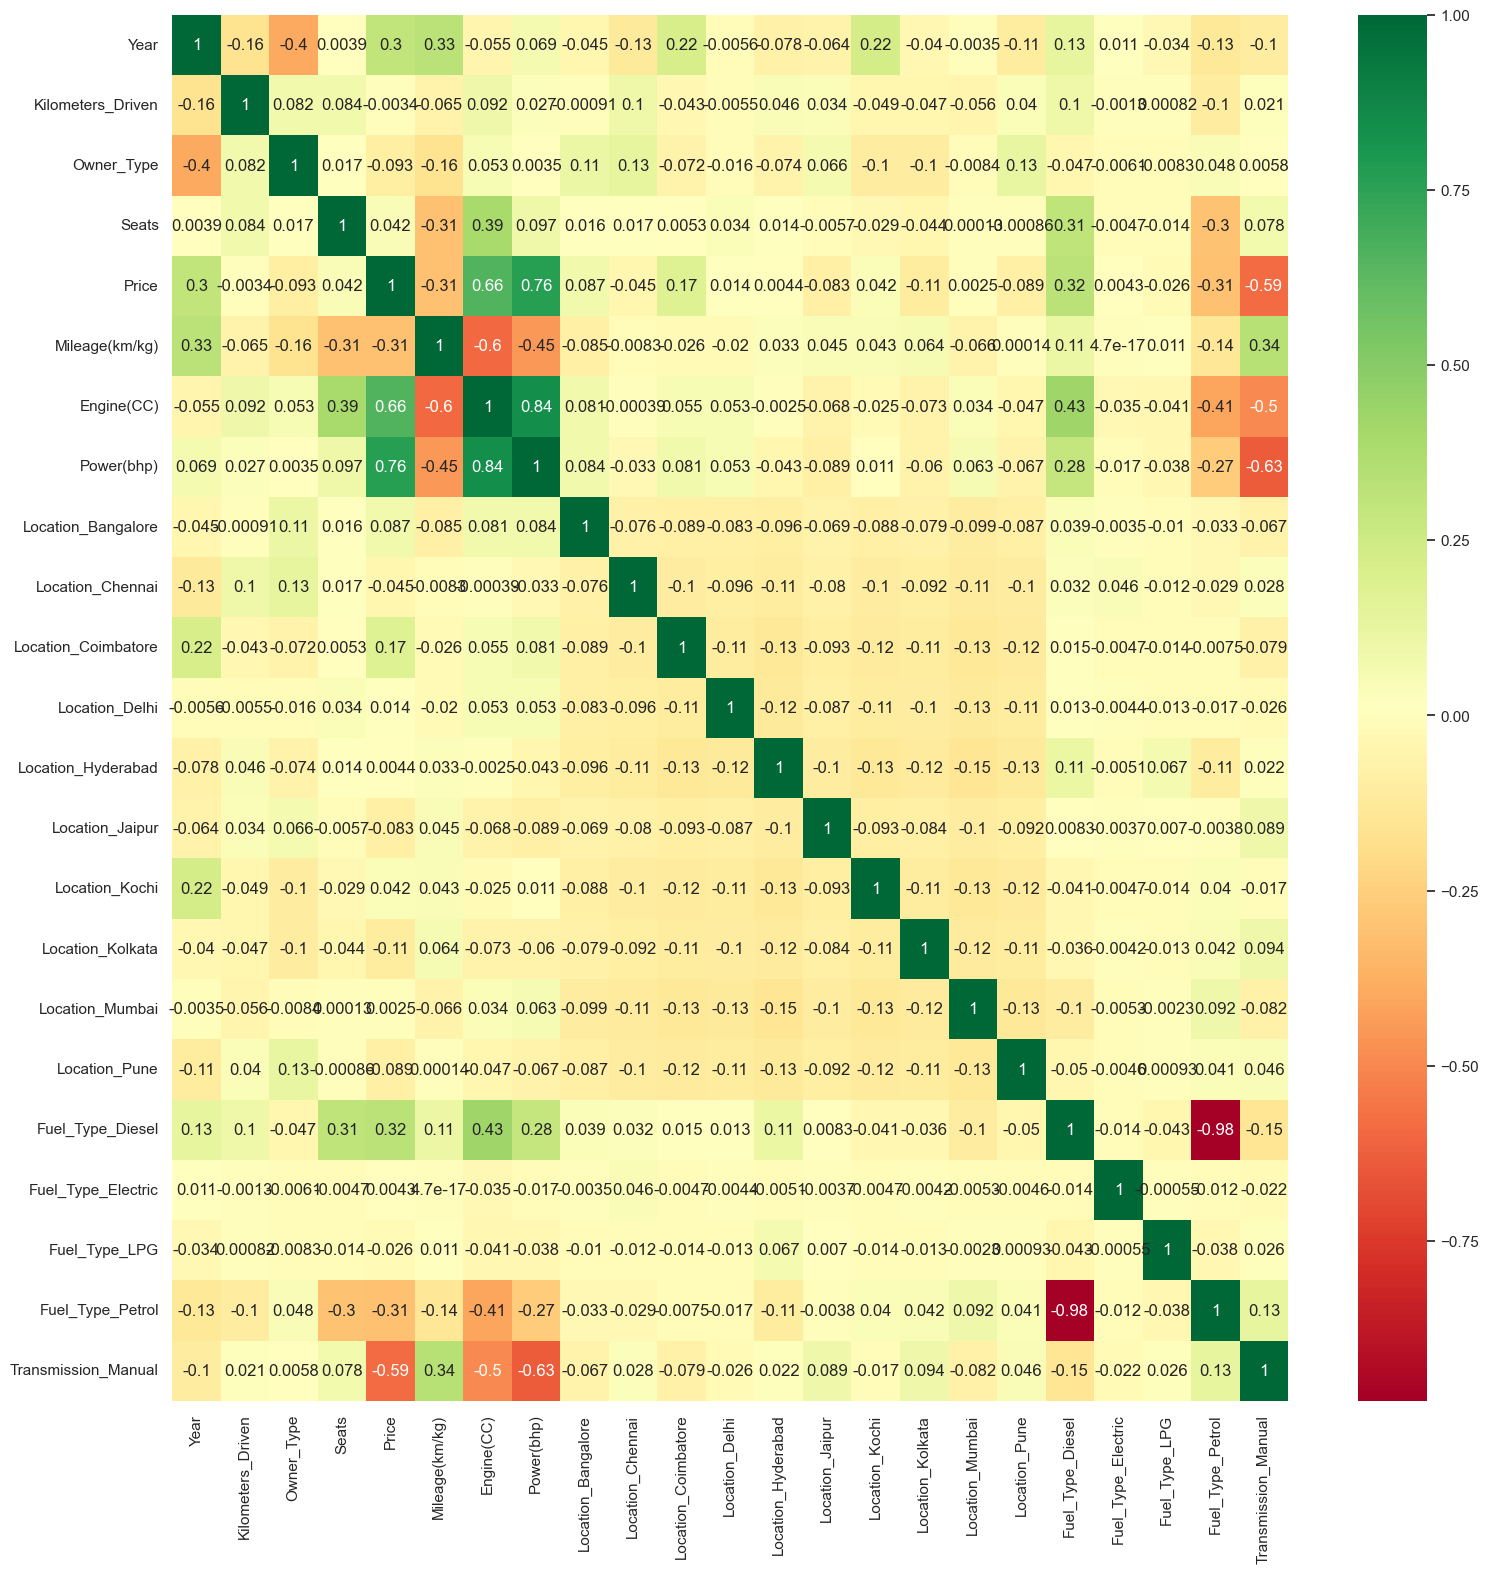

In [47]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

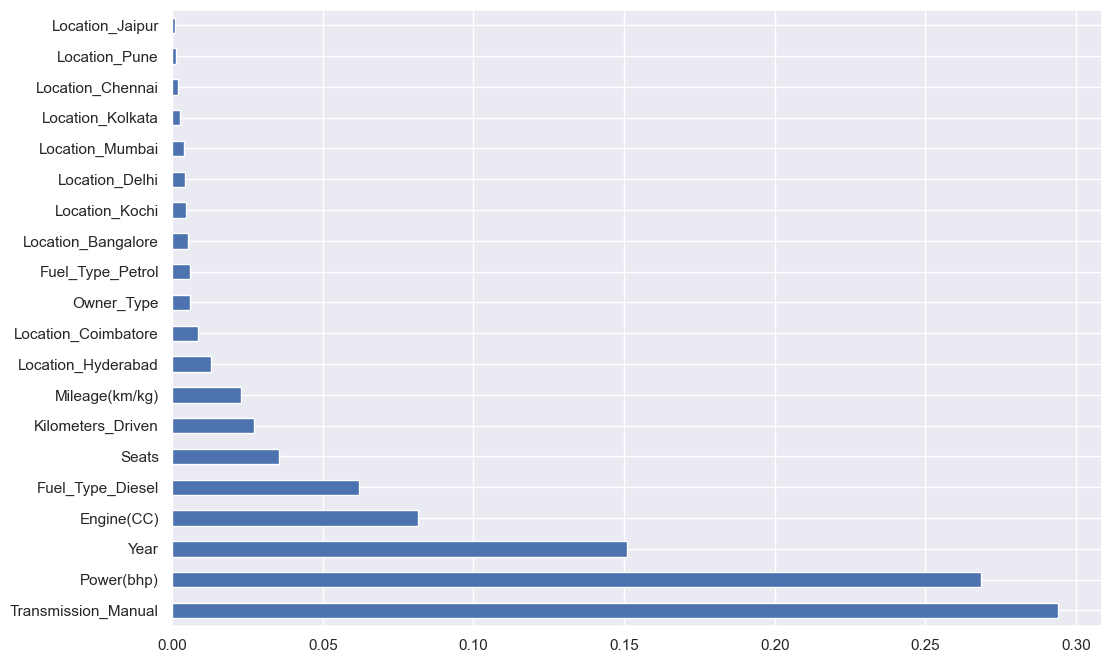

In [49]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Now we use built in model

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

 Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred1= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.6906890875641253
Accuracy on Testing set:  0.6927994115332985


Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred2= rf_reg.predict(X_test)
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy on Training set:  0.9832565580626805
Accuracy on Testing set:  0.8695692563442383


Gradient boosting regressor

In [53]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=42)

# Fitting the data
grad_reg.fit(X_train, y_train)

y_pred_gb = grad_reg.predict(X_test)
# Checking the score
print('Training Score: ', grad_reg.score(X_train, y_train))
print('Testing Score: ', grad_reg.score(X_test, y_test))

c:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score:  0.9551510630082838
Testing Score:  0.8709851825078492


Decision tree regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

# Train the model on the training set
dt_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = dt_reg.predict(X_test)

# Print accuracy on the training set
print("Accuracy on Training set: ", dt_reg.score(X_train, y_train))

# Print accuracy on the testing set
print("Accuracy on Testing set: ", dt_reg.score(X_test, y_test))


Accuracy on Training set:  0.9999986916517211
Accuracy on Testing set:  0.8264481361284419


Hyperparametric tuning

since Random forest regressor have best accuracy score so i chose to do hyperparametric tuning on this algorithm

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a RandomForestRegressor
rf_reg = RandomForestRegressor()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_rf_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test set: ", mse)


c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error on Test set:  16.247113625833634


In [60]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table for linear regression model")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R Squared                : ', metrics.r2_score(y_test, y_pred1))
print("\t\tError Table for random forest regression model")

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared                : ', metrics.r2_score(y_test, y_pred))
print("\t\tError Table for decision tree regression model")

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
print('R Squared                : ', metrics.r2_score(y_test, y_pred_dt))


		Error Table for linear regression model
Mean Absolute Error      :  3.864003951321694
Mean Squared  Error      :  37.10332816143006
Root Mean Squared  Error :  6.091250131248105
R Squared                :  0.6927994115332985
		Error Table for random forest regression model
Mean Absolute Error      :  1.592412816083102
Mean Squared  Error      :  16.247113625833634
Root Mean Squared  Error :  4.030770847596479
R Squared                :  0.8654804538011803
		Error Table for decision tree regression model
Mean Absolute Error      :  1.944045202952029
Mean Squared  Error      :  20.961391351476014
Root Mean Squared  Error :  4.578361208060807
R Squared                :  0.8264481361284419


In [61]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


print("\t\tError Table for gradient boosting regressor model")

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred_gb))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))
print('R Squared                : ', metrics.r2_score(y_test, y_pred_gb))

		Error Table for gradient boosting regressor model
Mean Absolute Error      :  1.6936158893380369
Mean Squared  Error      :  15.582258924016173
Root Mean Squared  Error :  3.9474370069725206
R Squared                :  0.8709851825078492


Let's try on given test dataset since random forest regressor have best score so we predict target varible for test dataset

In [62]:


Y_predict = grid_search.predict(final_test)

predictions_df = pd.DataFrame({'Predicted_Target': Y_predict}).round(2)
predictions_df.head()
predictions_df.to_csv('Data/predictions.csv',index=False)

